In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas_datareader as pdr

In [ ]:
stock_price_df = pdr.get_data_tiingo('AAPL', api_key='424892e0e5bb46bab307b21f5ed059616924fff3')

In [ ]:
stock_price_df.to_csv('AAPL.csv')

In [ ]:
stock_price = pd.read_csv('/content/gdrive/MyDrive/AAPL.csv')
stock_price.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-02 00:00:00+00:00,166.68,168.94,164.47,166.64,37586791,39.671106,40.209003,39.145109,39.661585,150347164,0.0,1.0
1,AAPL,2018-04-03 00:00:00+00:00,168.39,168.75,164.88,167.64,30278046,40.078099,40.163781,39.242692,39.899593,121112184,0.0,1.0
2,AAPL,2018-04-04 00:00:00+00:00,171.61,172.01,164.77,164.88,34605489,40.844483,40.939686,39.216511,39.242692,138421956,0.0,1.0
3,AAPL,2018-04-05 00:00:00+00:00,172.80,174.23,172.08,172.58,26933197,41.127712,41.468063,40.956347,41.075350,107732788,0.0,1.0
4,AAPL,2018-04-06 00:00:00+00:00,168.38,172.48,168.20,170.97,35005290,40.075718,41.051550,40.032877,40.692158,140021160,0.0,1.0


In [ ]:
stock_price.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,AAPL,2023-03-27 00:00:00+00:00,158.28,160.77,157.870,159.94,52390266,158.28,160.77,157.870,159.94,52390266,0.0,1.0
1256,AAPL,2023-03-28 00:00:00+00:00,157.65,158.49,155.980,157.97,45992152,157.65,158.49,155.980,157.97,45992152,0.0,1.0
1257,AAPL,2023-03-29 00:00:00+00:00,160.77,161.05,159.350,159.37,51305691,160.77,161.05,159.350,159.37,51305691,0.0,1.0
1258,AAPL,2023-03-30 00:00:00+00:00,162.36,162.47,161.271,161.53,49501689,162.36,162.47,161.271,161.53,49501689,0.0,1.0
1259,AAPL,2023-03-31 00:00:00+00:00,164.90,165.00,161.910,162.44,68749792,164.90,165.00,161.910,162.44,68749792,0.0,1.0


In [ ]:
stock_price_new = stock_price.reset_index()['close']

In [ ]:
stock_price_new

0       166.68
1       168.39
2       171.61
3       172.80
4       168.38
         ...  
1255    158.28
1256    157.65
1257    160.77
1258    162.36
1259    164.90
Name: close, Length: 1260, dtype: float64

In [ ]:
stock_price_new.shape

(1260,)

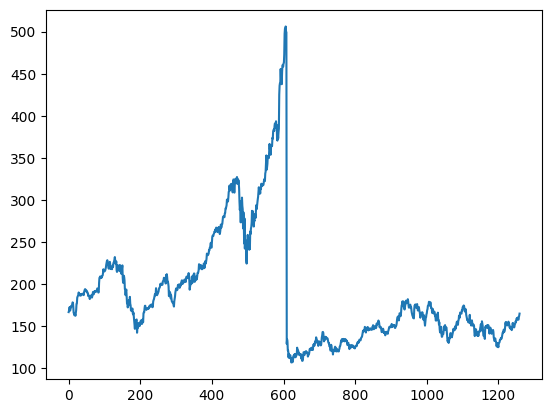

In [ ]:
plt.plot(stock_price_new)

LSTM are sensitive to the scale of the date, so we apply minmax scalar

In [ ]:
scalar = MinMaxScaler(feature_range=(0,1)) ## feature_range : scale the values to this range
stock_price_new = scalar.fit_transform(np.array(stock_price_new).reshape(-1,1))

In [ ]:
stock_price_new

array([[0.14988103],
       [0.15416406],
       [0.16222918],
       ...,
       [0.13507827],
       [0.13906074],
       [0.14542267]])

In [ ]:
stock_price_new.shape

(1260, 1)

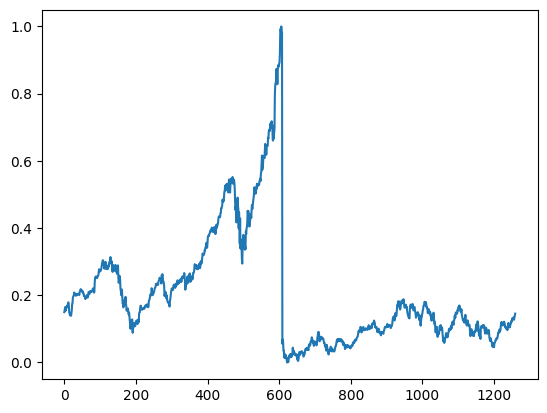

In [ ]:
plt.plot(stock_price_new) 

In [ ]:
#split into train and test dataset

train_size = int(len(stock_price_new)*0.65)
test_size = len(stock_price_new) - train_size
train_stock_price = stock_price_new[:train_size,:]
test_stock_price = stock_price_new[train_size:,:1]

In [ ]:
print("train data shape -", train_stock_price.shape,"\ntest data shape -", test_stock_price.shape)

train data shape - (819, 1) 
test data shape - (441, 1)


In [ ]:
train_stock_price

array([[1.49881027e-01],
       [1.54164058e-01],
       [1.62229180e-01],
       [1.65209768e-01],
       [1.54139011e-01],
       [1.58321853e-01],
       [1.66336882e-01],
       [1.64308078e-01],
       [1.68566061e-01],
       [1.70043832e-01],
       [1.72773951e-01],
       [1.78835316e-01],
       [1.77833438e-01],
       [1.65209768e-01],
       [1.47476518e-01],
       [1.46274264e-01],
       [1.40513463e-01],
       [1.42291797e-01],
       [1.43719474e-01],
       [1.38960551e-01],
       [1.46324358e-01],
       [1.55942392e-01],
       [1.74652473e-01],
       [1.75453976e-01],
       [1.92836569e-01],
       [1.96167815e-01],
       [1.98396994e-01],
       [2.01678147e-01],
       [2.08390733e-01],
       [2.04758923e-01],
       [2.03656857e-01],
       [1.99373826e-01],
       [2.03731997e-01],
       [2.00751409e-01],
       [1.99048215e-01],
       [2.02354415e-01],
       [2.01177207e-01],
       [2.04182843e-01],
       [2.03656857e-01],
       [2.04733876e-01],


In [ ]:
def create_dataset(data, time_step=1):
    data_x, data_y = [], []
    for i in range(len(data)-time_step-1):
        d = data[i:(i+time_step),0]
        data_x.append(d)
        data_y.append(data[(i+time_step),0])
        
    return np.array(data_x), np.array(data_y)

In [ ]:
x_train,y_train = create_dataset(train_stock_price, 100)
x_test, y_test = create_dataset(test_stock_price, 100)

In [ ]:
x_train.shape, y_train.shape

((718, 100), (718,))

In [ ]:
x_test.shape, y_test.shape

((340, 100), (340,))

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.shape, x_test.shape

((718, 100, 1), (340, 100, 1))

## LSTM 

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 404ms/step - loss: 0.0454 - val_loss: 0.0029
Epoch 2/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0150 - val_loss: 0.0031
Epoch 3/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0107 - val_loss: 4.4977e-04
Epoch 4/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0100 - val_loss: 0.0011
Epoch 5/100
12/12 [==============================] - 4s 367ms/step - loss: 0.0104 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0098 - val_loss: 0.0019
Epoch 7/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0082 - val_loss: 5.6862e-04
Epoch 8/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0068 - val_loss: 7.3557e-04
Epoch 9/100
12/12 [==============================] - 4s 308ms/step - loss: 0.0068 - val_loss: 5.1281e-04
Epoch 10/100
12/12 [==============================] - 3s 279ms/step - loss

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 1s 48ms/step


In [ ]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [ ]:
np.sqrt(mean_squared_error(y_train, train_predict))

230.84037312391007

In [ ]:
np.sqrt(mean_squared_error(y_test, test_predict))

155.8948303163089

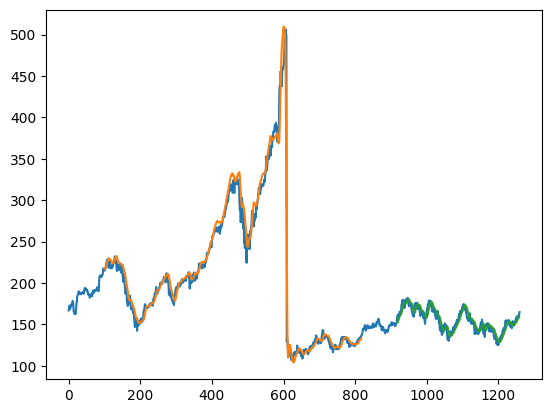

In [ ]:
from sys import set_asyncgen_hooks
#plot

look_back = 100
train_predict_plot = np.empty_like(stock_price_new)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, : ] = train_predict

test_predict_plot = np.empty_like(stock_price_new)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1 :len(stock_price_new)-1, : ] = test_predict

plt.plot(scalar.inverse_transform(stock_price_new))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [51]:
x_input = test_stock_price[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [54]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [55]:
temp_input

[0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.06654978083907

In [ ]:
 # demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [73]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [83]:
stock_price_new[1160:].shape

(100, 1)

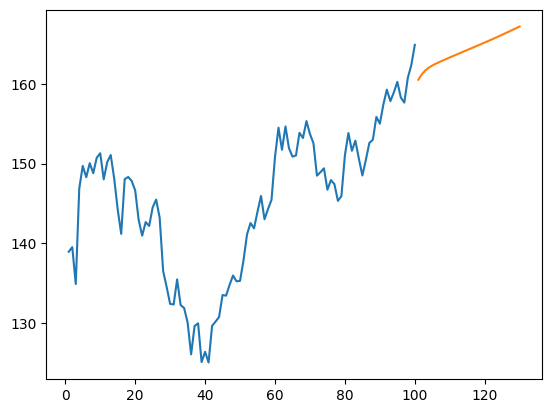

In [84]:
plt.plot(day_new,scalar.inverse_transform(stock_price_new[1160:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

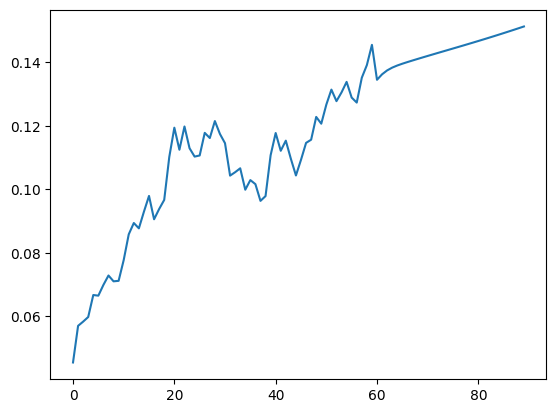

In [85]:
df3=stock_price_new.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [87]:
df3=scalar.inverse_transform(df3).tolist()

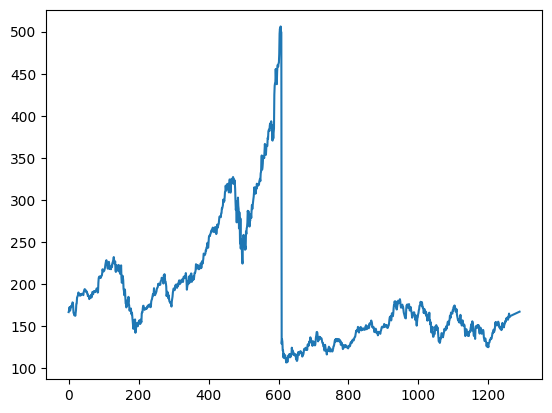

In [88]:
plt.plot(df3)